In [54]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [65]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

hostname = 'diabetes-dataset.cwpas6tssjkb.us-east-1.rds.amazonaws.com'
database = 'diabetes_database'
username = '' # enter your username manually
password = '' # enter your password manually
port_id = 5432

try:
    conn = psycopg2.connect(
        host = 'diabetes-dataset.cwpas6tssjkb.us-east-1.rds.amazonaws.com',
        dbname = database,
        user = 'mislam',
        password = 'MPIA-dd#',
        port = 5432)
    print("Connected to the database!")

except Exception as e:
    print(f"Unable to connect to the database. Error: {e}")

# example query to grab all of the columns
sql_query = "SELECT * FROM clean_diab_info"
df = pd.read_sql_query(sql_query, conn)
df.head()

# once you are down performing your queries, make sure to close the connection


Connected to the database!


C:\Users\tedta\AppData\Local\Temp\ipykernel_1836\1644604849.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


,ID,GENDER,AGE,BMI,DIABETES,DIABTYPE,INSULIN_Y/N,A-one-C_test,EYEEXAM1,DIABEYE1,DIAB_MNGMT,FEETSORE,PERSONAL_DOC,HRT_ATTACK,HRT_DISEASE,STROKE,ARTHRITIS
0,55982,FEMALE,13.0,Over_Weight,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,55988,MALE,13.0,Over_Weight,1.0,2.0,0.0,2.0,1.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0
2,55992,MALE,11.0,Over_Weight,1.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,55995,MALE,11.0,Over_Weight,1.0,2.0,0.0,1.0,3.0,3.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56001,MALE,12.0,Obese,1.0,2.0,1.0,4.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0


In [66]:
df.columns

Index(['ID', 'GENDER', 'AGE', 'BMI', 'DIABETES', 'DIABTYPE', 'INSULIN_Y/N',
       'A-one-C_test', 'EYEEXAM1', 'DIABEYE1', 'DIAB_MNGMT', 'FEETSORE',
       'PERSONAL_DOC', 'HRT_ATTACK', 'HRT_DISEASE', 'STROKE', 'ARTHRITIS'],
      dtype='object')

In [67]:
diabetes_df=df[["DIABETES","DIABTYPE","AGE","INSULIN_Y/N","A-one-C_test","EYEEXAM1","DIABEYE1","DIAB_MNGMT","PERSONAL_DOC","HRT_DISEASE","STROKE","ARTHRITIS"]]

In [68]:
diabetes_category=diabetes_df.loc[(diabetes_df["DIABTYPE"]==1) | (diabetes_df["DIABTYPE"]==2) ]

In [69]:
diabetes_category

,DIABETES,DIABTYPE,AGE,INSULIN_Y/N,A-one-C_test,EYEEXAM1,DIABEYE1,DIAB_MNGMT,PERSONAL_DOC,HRT_DISEASE,STROKE,ARTHRITIS
0,1.0,1.0,13.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,13.0,0.0,2.0,1.0,1.0,6.0,1.0,0.0,0.0,0.0
2,1.0,2.0,11.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0
3,1.0,2.0,11.0,0.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,0.0
4,1.0,2.0,12.0,1.0,4.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9970,1.0,2.0,11.0,0.0,4.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0
9971,1.0,2.0,10.0,0.0,2.0,2.0,2.0,6.0,1.0,0.0,0.0,1.0
9972,1.0,1.0,13.0,1.0,4.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0
9973,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [14]:
diabetes_df


,DIABETE4,_AGEG5YR,SEXVAR,DIABTYPE,PREDIAB2,PDIABTS1,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE
0,1.0,13.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,13.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,14.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
445127,3.0,1.0,2.0,NaN,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
445128,3.0,7.0,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
445129,3.0,10.0,2.0,NaN,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
445130,3.0,11.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
diabetes_df=diabetes_df.drop(columns=["PREDIAB2","PDIABTS1"])

In [16]:
diabetes_category=diabetes_df.loc[(diabetes_df["DIABTYPE"]==1) | (diabetes_df["DIABTYPE"]==2) ]

In [17]:
diabetes_category

,DIABETE4,_AGEG5YR,SEXVAR,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE
55982,1.0,13.0,2.0,1.0,2.0,88.0,1.0,1.0,8.0,2.0
55988,1.0,13.0,1.0,2.0,2.0,2.0,1.0,1.0,6.0,2.0
55992,1.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,8.0,2.0
55995,1.0,11.0,1.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0
56001,1.0,12.0,1.0,2.0,1.0,4.0,2.0,2.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...
445060,1.0,11.0,1.0,2.0,2.0,4.0,2.0,2.0,8.0,2.0
445080,1.0,10.0,1.0,2.0,2.0,2.0,2.0,2.0,6.0,1.0
445097,1.0,13.0,1.0,1.0,1.0,4.0,2.0,2.0,8.0,2.0
445112,1.0,1.0,1.0,2.0,1.0,2.0,8.0,8.0,8.0,2.0


In [70]:
X=diabetes_category[["DIABETES","AGE","INSULIN_Y/N","A-one-C_test","EYEEXAM1","DIABEYE1","DIAB_MNGMT","PERSONAL_DOC","HRT_DISEASE","STROKE","ARTHRITIS"]]

In [71]:
y=diabetes_category["DIABTYPE"]

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9072681704260651
Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.04      0.08       191
         2.0       0.91      1.00      0.95      1804

    accuracy                           0.91      1995
   macro avg       0.85      0.52      0.52      1995
weighted avg       0.90      0.91      0.87      1995



D:\Ubisoft\New folder\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8426065162907268
Classification Report:
              precision    recall  f1-score   support

         1.0       0.20      0.22      0.21       191
         2.0       0.92      0.91      0.91      1804

    accuracy                           0.84      1995
   macro avg       0.56      0.56      0.56      1995
weighted avg       0.85      0.84      0.85      1995



In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8982456140350877
Classification Report:
              precision    recall  f1-score   support

         1.0       0.41      0.14      0.20       191
         2.0       0.91      0.98      0.95      1804

    accuracy                           0.90      1995
   macro avg       0.66      0.56      0.57      1995
weighted avg       0.87      0.90      0.87      1995



In [133]:
importances = random_forest.feature_importances_
# We can sort the features by their importance
sorted(zip(random_forest.feature_importances_, X.columns), reverse=True)

[(0.27866679106409264, 'AGE'),
 (0.17658839425973108, 'A-one-C_test'),
 (0.13534107234067225, 'DIAB_MNGMT'),
 (0.10695982147716883, 'DIABEYE1'),
 (0.10199544892858443, 'EYEEXAM1'),
 (0.05639839131626288, 'PERSONAL_DOC'),
 (0.04928613286548186, 'INSULIN_Y/N'),
 (0.03834011300141258, 'ARTHRITIS'),
 (0.031205604471159956, 'HRT_DISEASE'),
 (0.02521823027543358, 'STROKE'),
 (0.0, 'DIABETES')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

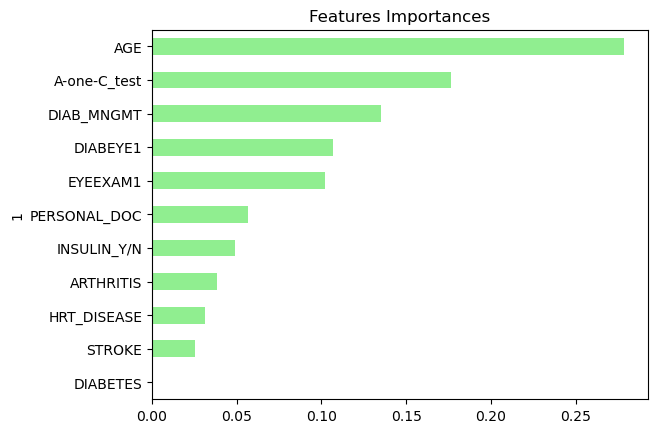

In [134]:
importances_df = pd.DataFrame(sorted(zip(random_forest.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [136]:
X=diabetes_category[["AGE","INSULIN_Y/N","A-one-C_test","EYEEXAM1","DIABEYE1","DIAB_MNGMT","PERSONAL_DOC"]]

In [137]:
y=diabetes_category["DIABTYPE"]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
random_forest_2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8957393483709273
Classification Report:
              precision    recall  f1-score   support

         1.0       0.39      0.15      0.22       191
         2.0       0.92      0.97      0.94      1804

    accuracy                           0.90      1995
   macro avg       0.65      0.56      0.58      1995
weighted avg       0.86      0.90      0.87      1995



In [79]:
from sklearn.svm import SVC

In [140]:
svm_classifier = SVC(kernel='linear', C=1, random_state=42)

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9042606516290727
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       191
         2.0       0.90      1.00      0.95      1804

    accuracy                           0.90      1995
   macro avg       0.45      0.50      0.47      1995
weighted avg       0.82      0.90      0.86      1995



D:\Ubisoft\New folder\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Ubisoft\New folder\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Ubisoft\New folder\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8962406015037594
Classification Report:
              precision    recall  f1-score   support

         1.0       0.37      0.12      0.18       191
         2.0       0.91      0.98      0.94      1804

    accuracy                           0.90      1995
   macro avg       0.64      0.55      0.56      1995
weighted avg       0.86      0.90      0.87      1995



In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [143]:
y= y.astype(int)

In [144]:
y_mapping = {1: 0, 2: 1, 7: 2, 9: 3}
y_1 = np.array([y_mapping[label] for label in y])

In [145]:
y_1

array([0, 1, 1, ..., 0, 1, 1])

In [146]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9027568922305764
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.13      0.20       191
           1       0.91      0.98      0.95      1804

    accuracy                           0.90      1995
   macro avg       0.69      0.56      0.58      1995
weighted avg       0.87      0.90      0.88      1995



Accuracy: 0.9032581453634085
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.14      0.21       190
           1       0.92      0.98      0.95      1805

    accuracy                           0.90      1995
   macro avg       0.69      0.56      0.58      1995
weighted avg       0.87      0.90      0.88      1995



In [147]:
X=diabetes_category[["DIABETES","AGE","INSULIN_Y/N","A-one-C_test","EYEEXAM1","DIABEYE1","DIAB_MNGMT","PERSONAL_DOC","HRT_DISEASE","STROKE","ARTHRITIS"]]

In [148]:
y=diabetes_category["DIABTYPE"]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [151]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [52]:
pip install tensorflow keras

     ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/300.9 MB 3.3 MB/s eta 0:01:32
     ---------------------------------------- 0.4/300.9 MB 4.7 MB/s eta 0:01:04
     ---------------------------------------- 0.8/300.9 MB 6.3 MB/s eta 0:00:48
     ---------------------------------------- 1.2/300.9 MB 7.5 MB/s eta 0:00:40
     ---------------------------------------- 1.5/300.9 MB 7.2 MB/s eta 0:00:42
     ---------------------------------------- 2.0/300.9 MB 7.6 MB/s eta 0:00:40
     ---------------------------------------- 2.6/300.9 MB 8.2 MB/s eta 0:00:37
     ---------------------------------------- 3.1/300.9 MB 8.6 MB/s eta 0:00:35
     ---------------------------------------- 3.6/300.9 MB 9.0 MB/s eta 0:00:34
      --------------------------------------- 4.2/300.9 MB 8.9 MB/s eta 0:00:34
      --------------------------------------- 4.7/300.9 MB 9.3 MB/s eta 0:00:32
      --------------------------------------- 5

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf



# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [104]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=11))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [105]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

ModuleNotFoundError: No module named 'keras_tuner'

In [106]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [107]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [108]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 16s]
val_accuracy: 0.08540496975183487

Best val_accuracy So Far: 0.08540496975183487
Total elapsed time: 00h 06m 38s


In [109]:
X=diabetes_category[["DIABETES","AGE","INSULIN_Y/N","A-one-C_test","EYEEXAM1","DIABEYE1","DIAB_MNGMT","PERSONAL_DOC","HRT_DISEASE","STROKE","ARTHRITIS"]]

In [110]:
y=diabetes_category["DIABTYPE"]

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf



# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [112]:
logreg_model_1 = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9157979149959904
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.01      0.03       213
         2.0       0.92      1.00      0.96      2281

    accuracy                           0.92      2494
   macro avg       0.96      0.51      0.49      2494
weighted avg       0.92      0.92      0.88      2494



In [113]:
decision_tree_1 = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree_1.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4843624699278268
Classification Report:
              precision    recall  f1-score   support

         1.0       0.10      0.61      0.17       213
         2.0       0.93      0.47      0.63      2281

    accuracy                           0.48      2494
   macro avg       0.51      0.54      0.40      2494
weighted avg       0.86      0.48      0.59      2494



D:\Ubisoft\New folder\envs\dev\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [114]:
random_forest_1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_1.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8376102646351243
Classification Report:
              precision    recall  f1-score   support

         1.0       0.10      0.11      0.11       213
         2.0       0.92      0.91      0.91      2281

    accuracy                           0.84      2494
   macro avg       0.51      0.51      0.51      2494
weighted avg       0.85      0.84      0.84      2494



D:\Ubisoft\New folder\envs\dev\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [115]:
y= y.astype(int)

In [116]:

y_mapping = {1: 0, 2: 1, 7: 2, 9: 3}
y_1 = np.array([y_mapping[label] for label in y])

In [119]:
xgb_classifier_1 = xgb.XGBClassifier(objective='multi:softmax', num_class=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the model on the training data
xgb_classifier_1.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = xgb_classifier_1.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.899749373433584
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.12      0.19       191
           1       0.91      0.98      0.95      1804

    accuracy                           0.90      1995
   macro avg       0.67      0.55      0.57      1995
weighted avg       0.87      0.90      0.87      1995



In [128]:
X=diabetes_category[["DIABETES","AGE","INSULIN_Y/N","A-one-C_test","EYEEXAM1","DIABEYE1","DIAB_MNGMT","PERSONAL_DOC","HRT_DISEASE","STROKE","ARTHRITIS"]]

In [129]:
y=diabetes_category["DIABTYPE"]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [132]:
knn_classifier_1 = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_classifier_1.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier_1.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8927318295739348
Classification Report:
              precision    recall  f1-score   support

         1.0       0.33      0.12      0.17       191
         2.0       0.91      0.98      0.94      1804

    accuracy                           0.89      1995
   macro avg       0.62      0.55      0.56      1995
weighted avg       0.86      0.89      0.87      1995

